In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1 Effet de la régularisation ridge

## 1. Générez un jeu de données synthétique avec la fonction make_regression de Scikit-learn :

In [116]:
X, y, w = make_regression(n_samples =100, n_features =10, n_informative =8,
coef=True , random_state =42)
w

array([93.62122462,  0.        ,  3.15861448, 63.64302495,  0.        ,
       10.45678403, 70.64757265, 16.74825823,  5.19712837, 54.12963353])

### w represente les coefficient de la relation entre X et y . Le premier element et le deuxieme element du vecteur w sont nuls ce qui veut dire que la premiere et la 2eme caracteristique de X multiplié à 0 pour trouver y 

In [117]:
lambdas = np.logspace(-3,4,100)

In [118]:
coefs = []
errors_coefs = []
for a in lambdas:
    clf = Ridge(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_absolute_error(clf.coef_ , w))

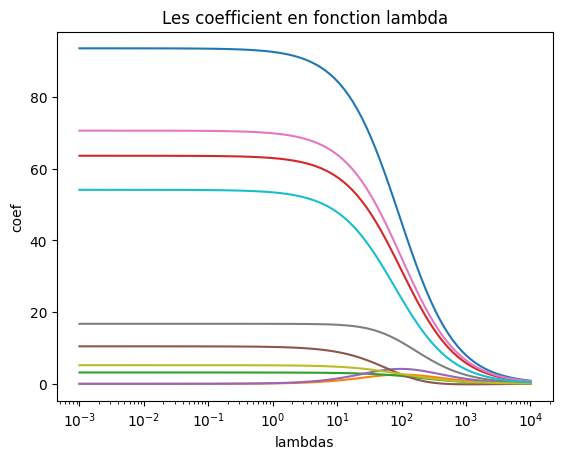

In [119]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")
plt.xlabel("lambdas")
plt.ylabel("coef")
plt.title("Les coefficient en fonction lambda")
plt.show()

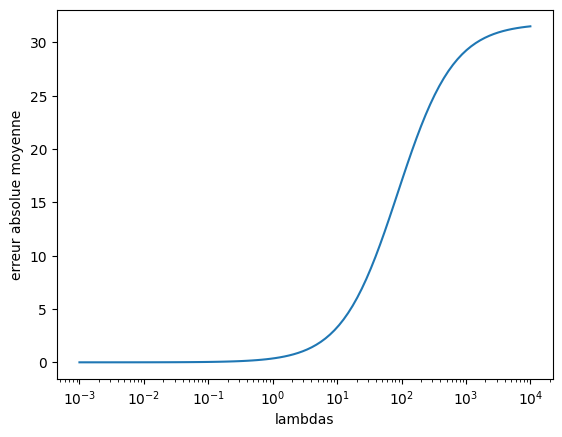

In [120]:
plt.plot(lambdas,errors_coefs)
plt.xlabel("lambdas")
plt.ylabel("erreur absolue moyenne")
plt.xscale('log')

# 2 Impact de la normalisation des données

In [121]:
df = pd.read_csv("./real_estate.csv", delimiter=",")
df.drop(columns =["No"], inplace=True)
y = df["Y house price of unit area"]
X = df.drop(columns =["Y house price of unit area"])
df.head (10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


## 2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié

In [123]:
X_train,X_Test,y_train,y_Test=train_test_split(X,y,test_size=0.5,random_state=42)

## 3. Entraînez un modèle de régression ridge sur les données d’entraînement, en sélectionnant la valeur de λ par validation croisée à l’aide de la classe RidgeCV de Scikit-learn

In [133]:
ridge = RidgeCV(alphas=lambdas).fit(X_train, y_train)
pred = ridge.predict (X_Test)
print(f"Best lambda is {ridge.alpha_}")

Best lambda is 0.0036783797718286343


## 4. Calculez l’erreur quadratique moyenne (MSE) et le coefficient de détermination R2 du modèle obtenu, sur les données de test

In [134]:
MSE=mean_squared_error(y_Test,pred)
r2=r2_score(y_Test,pred)
print(f'MSE = {MSE} et R2 = {r2}')

MSE = 64.83186483867972 et R2 = 0.5915368945743638


## 5. Normalisez les données avec la classe StandardScaler

In [135]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)

## 6. Entraînez un modèle de régression ridge sur les données normalisées, avec la même procé- dure de validation croisée

In [136]:
ridge = RidgeCV(alphas=lambdas).fit(X_train_std, y_train)
pred = ridge.predict (X_test_std)
print(f"Best lambda is {ridge.alpha_}")

Best lambda is 12.61856883066021


## 7. Calculez l’erreur quadratique moyenne et le coefficient de détermination R2 et comparez les résultats obtenus avec ceux obtenus sans normalisation

In [128]:
MSE=mean_squared_error(y_Test,pred)
r2=r2_score(y_Test,pred)
print(f'MSE = {MSE} et R2 = {r2}')

MSE = 63.893167808003625 et R2 = 0.5974510095725649


## 8. Commentez les résultats obtenus

In [129]:
pass

# 3 Régression LASSO

In [130]:
df = pd.read_csv("./baseball_processed.csv", delimiter=",")
print(df.describe())

         lnSalary      BatAVG      OnBase        Runs        Hits     Doubles  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     6.535420    0.257825    0.323973   46.697329   92.833828   16.673591   
std      1.176543    0.039546    0.047132   29.020166   51.896322   10.452001   
min      4.691348    0.063000    0.063000    0.000000    1.000000    0.000000   
25%      5.438079    0.238000    0.297000   22.000000   51.000000    9.000000   
50%      6.606650    0.260000    0.323000   41.000000   91.000000   15.000000   
75%      7.673223    0.281000    0.354000   69.000000  136.000000   23.000000   
max      8.716044    0.457000    0.486000  133.000000  216.000000   49.000000   

          Triples    HomeRuns         RBI       Walks  StrikeOuts  \
count  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     2.338279    9.097923   44.020772   35.017804   56.706231   
std      2.543336    9.289934   29.559406   24.842474   33.8287

In [131]:
df.head(10)

,lnSalary,BatAVG,OnBase,Runs,Hits,Doubles,Triples,HomeRuns,RBI,Walks,StrikeOuts,StolenBases,Errors,FreeAgElig,FreeAge91,ArbElig,Arb91
0,8.101678,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0
1,7.863267,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0
2,7.824046,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0
3,7.813996,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0
4,7.746301,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0
5,7.684784,0.291,0.379,104,170,32,2,26,100,87,89,22,4,1,0,0,0
6,6.396930,0.258,0.370,34,86,14,1,14,38,15,45,0,10,1,0,0,0
7,6.131226,0.228,0.279,16,38,7,2,3,21,11,32,2,3,0,0,0,0
8,5.480639,0.250,0.327,40,61,11,0,1,18,24,26,14,2,0,0,0,0
9,5.298317,0.203,0.240,39,64,10,1,10,33,14,96,13,6,0,0,0,0
